<a href="https://colab.research.google.com/github/rajdas2001/Pokemon-EDA/blob/main/Pokemon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Pokemon Dataset

## Importing Necessary Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

In [117]:
df = pd.read_csv("pokemon_data.csv")
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## Checking for Column Data types and Null Values

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


## Creating Total Column

In [119]:
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


## Correlation Matrix

<ipython-input-120-51fc1b141171>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)


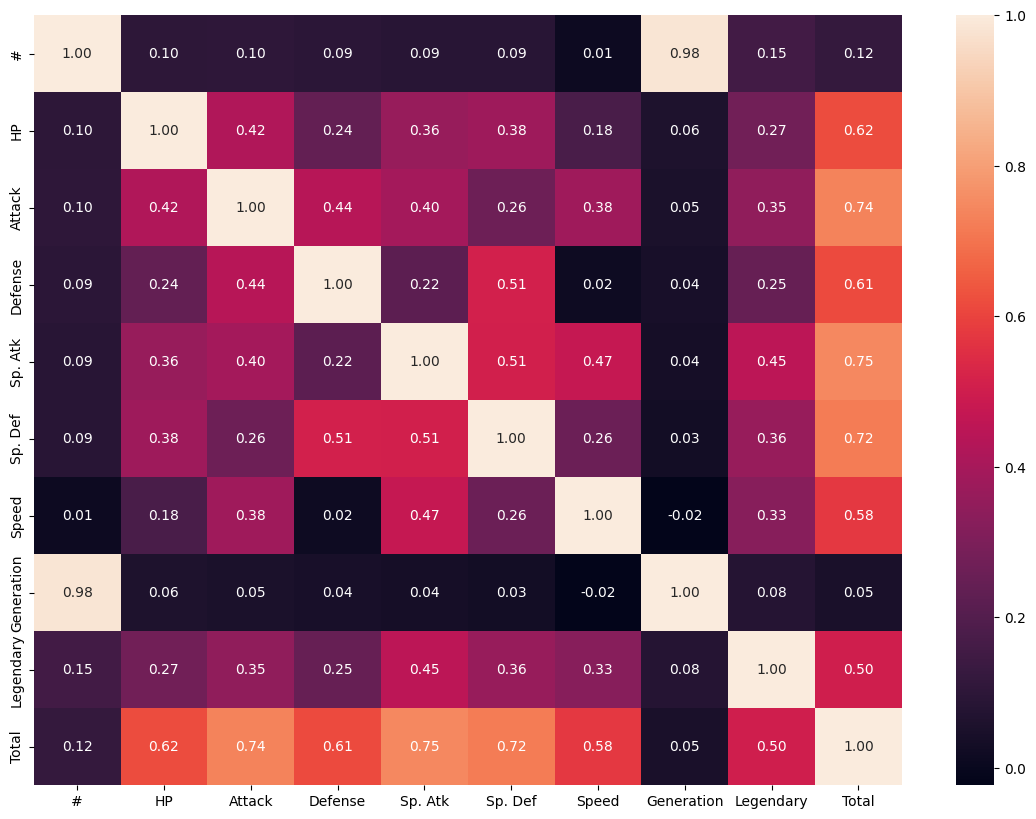

In [120]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

## Count of Pokemons according to Types

Text(0, 0.5, 'Count')

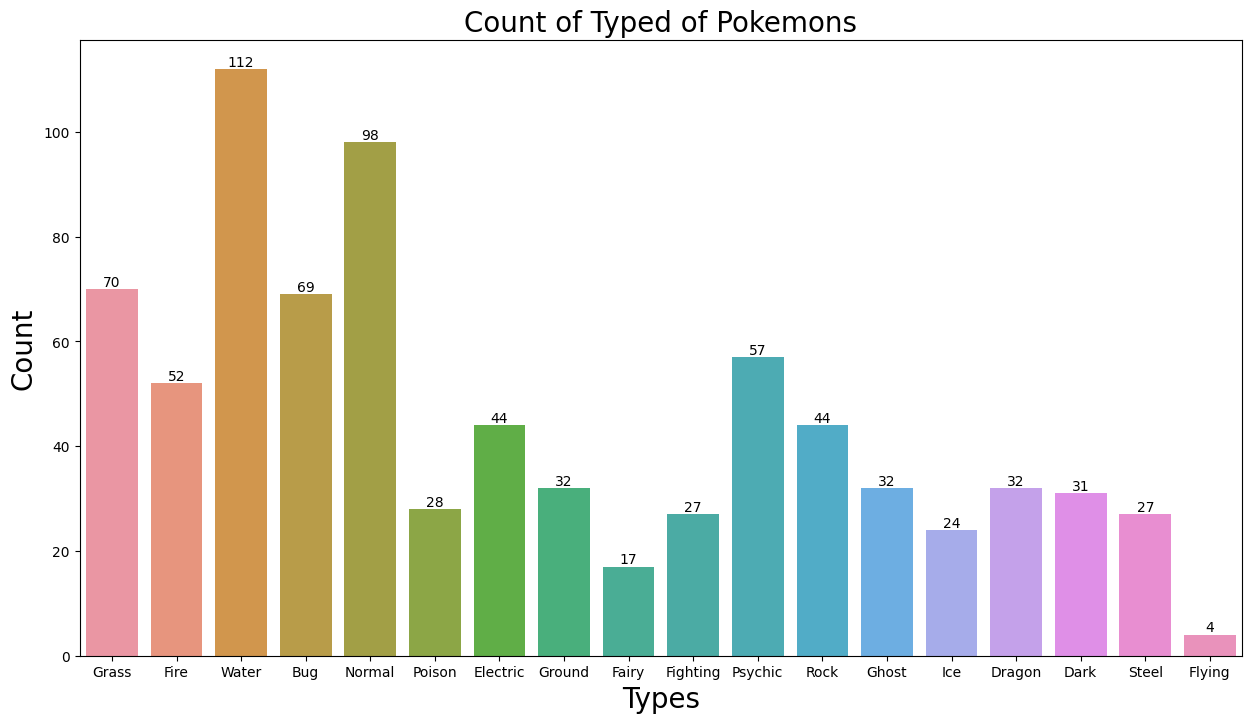

In [121]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Type 1", data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Typed of Pokemons',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Types', fontsize=20)
plt.ylabel('Count', fontsize=20)

## Number of Unique Types of Pokemons

In [122]:
df['Type 1'].nunique()

18

## Count of each type

In [123]:
print(df.groupby('Type 1').size())

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64


## Top 5 Pokemons by Ability

In [124]:
top_pokemons = df.sort_values(['Total'], ascending=False).reset_index()
top_pokemons.iloc[:5]

,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
1,164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780
2,163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
3,422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,770
4,424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770


## Top 5 Pokemon Types according to Ability

In [125]:
types = df.groupby('Type 1').agg({'Total':'mean'}).sort_values(by='Total',ascending=False)
print(types)

               Total
Type 1              
Dragon    550.531250
Steel     487.703704
Flying    485.000000
Psychic   475.947368
Fire      458.076923
Rock      453.750000
Dark      445.741935
Electric  443.409091
Ghost     439.562500
Ground    437.500000
Ice       433.458333
Water     430.455357
Grass     421.142857
Fighting  416.444444
Fairy     413.176471
Normal    401.683673
Poison    399.142857
Bug       378.927536


## Legendary Pokemons

In [126]:
legendary_pokemons = df.loc[df['Legendary']==True]
legendary_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
156,144,Articuno,Ice,Flying,90,85,100,95,125,85,1,True,580
157,145,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True,580
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True,580
162,150,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True,680
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


## Most Powerful Legendary Pokemons

In [127]:
legendary_pokemons = legendary_pokemons.sort_values(['Total'], ascending=False).reset_index()
legendary_pokemons.iloc[:5]

,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
1,164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780
2,426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
3,422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,770
4,424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770


## Number of Legendary Pokemons

Text(0, 0.5, 'Count')

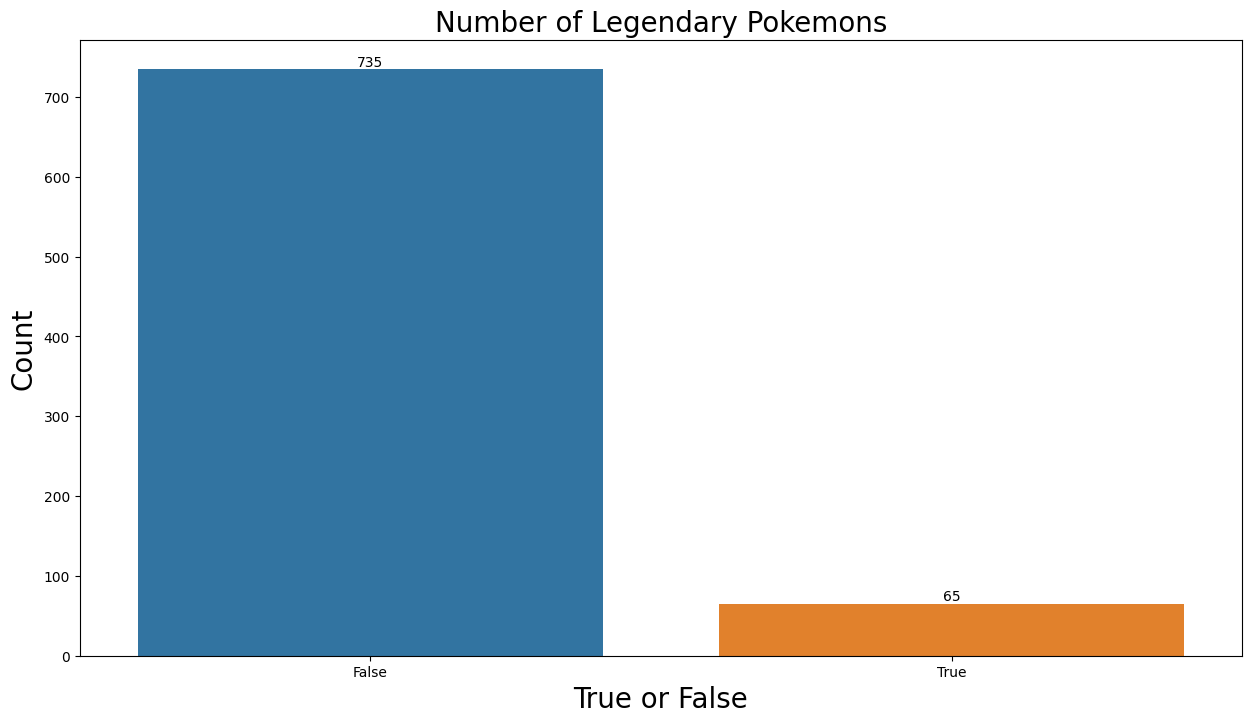

In [128]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Legendary", data=df)
ax.bar_label(ax.containers[0])
plt.title('Number of Legendary Pokemons',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('True or False', fontsize=20)
plt.ylabel('Count', fontsize=20)

## Number of Pokemons in each Generation

Text(0, 0.5, 'Count')

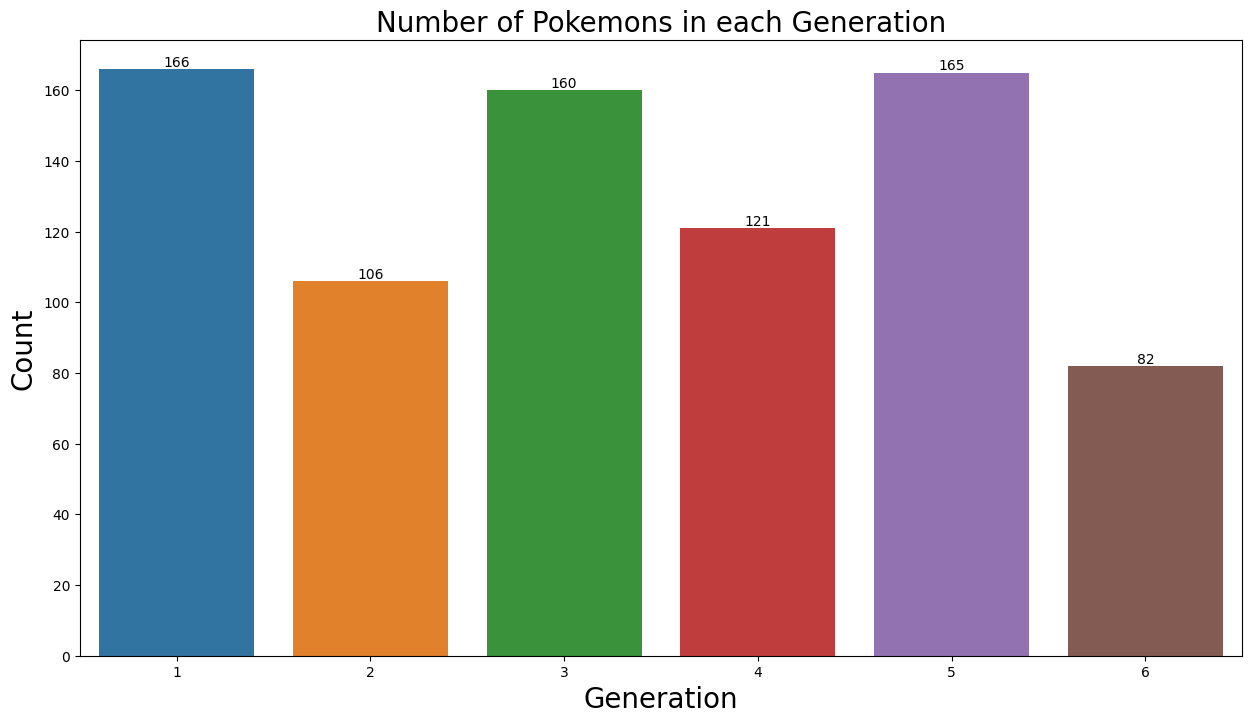

In [129]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Generation", data=df)
ax.bar_label(ax.containers[0])
plt.title('Number of Pokemons in each Generation',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Count', fontsize=20)

## Top Pokemons of Each Type

### Fire Type

In [130]:
strong_fire_pokemons = df.loc[df['Type 1']=='Fire']
strong_fire_pokemons.sort_values(by='Total',ascending=False)

top5_strong_fire_pokemons = strong_fire_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_fire_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
270,250,Ho-oh,Fire,Flying,106,130,90,110,154,90,2,True,680
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
279,257,BlazikenMega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False,630
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,600


### Dragon Type

In [131]:
strong_dragon_pokemons = df.loc[df['Type 1']=='Dragon']
strong_dragon_pokemons.sort_values(by='Total',ascending=False)

top5_strong_dragon_pokemons = strong_dragon_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_dragon_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
420,381,LatiosMega Latios,Dragon,Psychic,80,130,100,160,120,110,3,True,700
418,380,LatiasMega Latias,Dragon,Psychic,80,100,120,140,150,110,3,True,700
711,646,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,700
712,646,KyuremWhite Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True,700


### Steel Type

In [132]:
strong_steel_pokemons = df.loc[df['Type 1']=='Steel']
strong_steel_pokemons.sort_values(by='Total',ascending=False)

top5_strong_steel_pokemons = strong_steel_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_steel_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
413,376,MetagrossMega Metagross,Steel,Psychic,80,145,150,105,110,110,3,False,700
540,483,Dialga,Steel,Dragon,100,120,120,150,100,90,4,True,680
333,306,AggronMega Aggron,Steel,NaN,70,140,230,60,80,50,3,False,630
224,208,SteelixMega Steelix,Steel,Ground,75,125,230,55,95,30,2,False,610
427,385,Jirachi,Steel,Psychic,100,100,100,100,100,100,3,True,600


### Flying Type

In [133]:
strong_flying_pokemons = df.loc[df['Type 1']=='Flying']
strong_flying_pokemons.sort_values(by='Total',ascending=False)

top5_strong_flying_pokemons = strong_flying_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_flying_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
702,641,TornadusIncarnate Forme,Flying,NaN,79,115,70,125,80,111,5,True,580
703,641,TornadusTherian Forme,Flying,NaN,79,100,80,110,90,121,5,True,580
791,715,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False,535
790,714,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False,245


### Psychic Type

In [134]:
strong_psychic_pokemons = df.loc[df['Type 1']=='Psychic']
strong_psychic_pokemons.sort_values(by='Total',ascending=False)

top5_strong_psychic_pokemons = strong_psychic_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_psychic_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680
269,249,Lugia,Psychic,Flying,106,90,130,90,154,110,2,True,680
162,150,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True,680


### Rock Type

In [135]:
strong_rock_pokemons = df.loc[df['Type 1']=='Rock']
strong_rock_pokemons.sort_values(by='Total',ascending=False)

top5_strong_rock_pokemons = strong_rock_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_rock_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
268,248,TyranitarMega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,False,700
154,142,AerodactylMega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,615
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
267,248,Tyranitar,Rock,Dark,100,134,110,95,100,61,2,False,600


### Dark Type

In [136]:
strong_dark_pokemons = df.loc[df['Type 1']=='Dark']
strong_dark_pokemons.sort_values(by='Total',ascending=False)

top5_strong_dark_pokemons = strong_dark_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_dark_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
793,717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True,680
248,229,HoundoomMega Houndoom,Dark,Fire,75,90,90,140,90,115,2,False,600
696,635,Hydreigon,Dark,Dragon,92,105,90,125,90,98,5,False,600
549,491,Darkrai,Dark,NaN,70,90,90,135,90,125,4,True,600
393,359,AbsolMega Absol,Dark,NaN,65,150,60,115,60,115,3,False,565


### Electric Type

In [137]:
strong_electric_pokemons = df.loc[df['Type 1']=='Electric']
strong_electric_pokemons.sort_values(by='Total',ascending=False)

top5_strong_electric_pokemons = strong_electric_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_electric_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
196,181,AmpharosMega Ampharos,Electric,Dragon,90,95,105,165,110,45,2,False,610
705,642,ThundurusTherian Forme,Electric,Flying,79,105,70,145,80,101,5,True,580
157,145,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True,580
704,642,ThundurusIncarnate Forme,Electric,Flying,79,115,70,125,80,111,5,True,580
262,243,Raikou,Electric,NaN,90,85,75,115,100,115,2,True,580


### Ghost Type

In [138]:
strong_ghost_pokemons = df.loc[df['Type 1']=='Ghost']
strong_ghost_pokemons.sort_values(by='Total',ascending=False)

top5_strong_ghost_pokemons = strong_ghost_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_ghost_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
545,487,GiratinaOrigin Forme,Ghost,Dragon,150,120,100,120,100,90,4,True,680
544,487,GiratinaAltered Forme,Ghost,Dragon,150,100,120,100,120,90,4,True,680
102,94,GengarMega Gengar,Ghost,Poison,60,65,80,170,95,130,1,False,600
387,354,BanetteMega Banette,Ghost,NaN,64,165,75,93,83,75,3,False,555
529,477,Dusknoir,Ghost,NaN,45,100,135,65,135,45,4,False,525


### Ground Type

In [139]:
strong_ground_pokemons = df.loc[df['Type 1']=='Ground']
strong_ground_pokemons.sort_values(by='Total',ascending=False)

top5_strong_ground_pokemons = strong_ground_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_ground_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770
423,383,Groudon,Ground,NaN,100,150,140,100,90,90,3,True,670
708,645,LandorusIncarnate Forme,Ground,Flying,89,125,90,115,80,101,5,True,600
709,645,LandorusTherian Forme,Ground,Flying,89,145,90,105,80,91,5,True,600
515,464,Rhyperior,Ground,Rock,115,140,130,55,55,40,4,False,535


### Ice Type

In [140]:
strong_ice_pokemons = df.loc[df['Type 1']=='Ice']
strong_ice_pokemons.sort_values(by='Total',ascending=False)

top5_strong_ice_pokemons = strong_ice_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_ice_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
415,378,Regice,Ice,NaN,80,50,100,100,200,50,3,True,580
397,362,GlalieMega Glalie,Ice,NaN,80,120,80,120,80,100,3,False,580
156,144,Articuno,Ice,Flying,90,85,100,95,125,85,1,True,580
645,584,Vanilluxe,Ice,NaN,71,95,85,110,95,79,5,False,535
524,473,Mamoswine,Ice,Ground,110,130,80,70,60,80,4,False,530


### Water Type

In [141]:
strong_water_pokemons = df.loc[df['Type 1']=='Water']
strong_water_pokemons.sort_values(by='Total',ascending=False)

top5_strong_water_pokemons = strong_water_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_water_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,770
541,484,Palkia,Water,Dragon,90,120,100,150,120,100,4,True,680
421,382,Kyogre,Water,NaN,100,100,90,150,140,90,3,True,670
141,130,GyaradosMega Gyarados,Water,Dark,95,155,109,70,130,81,1,False,640
283,260,SwampertMega Swampert,Water,Ground,100,150,110,95,110,70,3,False,635


### Grass Type

In [142]:
strong_grass_pokemons = df.loc[df['Type 1']=='Grass']
strong_grass_pokemons.sort_values(by='Total',ascending=False)

top5_strong_grass_pokemons = strong_grass_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_grass_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
275,254,SceptileMega Sceptile,Grass,Dragon,70,110,75,145,85,145,3,False,630
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
551,492,ShayminSky Forme,Grass,Flying,100,103,75,120,75,127,4,True,600
550,492,ShayminLand Forme,Grass,NaN,100,100,100,100,100,100,4,True,600
511,460,AbomasnowMega Abomasnow,Grass,Ice,90,132,105,132,105,30,4,False,594


### Fighting Type

In [143]:
strong_fighting_pokemons = df.loc[df['Type 1']=='Fighting']
strong_fighting_pokemons.sort_values(by='Total',ascending=False)

top5_strong_fighting_pokemons = strong_fighting_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_fighting_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
498,448,LucarioMega Lucario,Fighting,Steel,70,145,88,140,70,112,4,False,625
497,448,Lucario,Fighting,Steel,70,110,70,115,70,90,4,False,525
336,308,MedichamMega Medicham,Fighting,Psychic,60,100,85,80,85,100,3,False,510
681,620,Mienshao,Fighting,NaN,65,125,60,95,60,105,5,False,510
594,534,Conkeldurr,Fighting,NaN,105,140,95,55,65,45,5,False,505


### Fairy Type

In [144]:
strong_fairy_pokemons = df.loc[df['Type 1']=='Fairy']
strong_fairy_pokemons.sort_values(by='Total',ascending=False)

top5_strong_fairy_pokemons = strong_fairy_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_fairy_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
792,716,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True,680
739,671,Florges,Fairy,NaN,78,65,68,112,154,75,6,False,552
519,468,Togekiss,Fairy,Flying,85,50,95,120,115,80,4,False,545
770,700,Sylveon,Fairy,NaN,95,65,65,110,130,60,6,False,525
41,36,Clefable,Fairy,NaN,95,70,73,95,90,60,1,False,483


### Normal Type

In [145]:
strong_normal_pokemons = df.loc[df['Type 1']=='Normal']
strong_normal_pokemons.sort_values(by='Total',ascending=False)

top5_strong_normal_pokemons = strong_normal_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_normal_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
552,493,Arceus,Normal,NaN,120,120,120,120,120,120,4,True,720
313,289,Slaking,Normal,NaN,150,160,100,95,65,100,3,False,670
543,486,Regigigas,Normal,NaN,110,160,110,80,110,100,4,True,670
715,648,MeloettaAria Forme,Normal,Psychic,100,77,77,128,128,90,5,False,600
716,648,MeloettaPirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,600


### Poison Type

In [146]:
strong_poison_pokemons = df.loc[df['Type 1']=='Poison']
strong_poison_pokemons.sort_values(by='Total',ascending=False)

top5_strong_poison_pokemons = strong_poison_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_poison_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
183,169,Crobat,Poison,Flying,85,90,80,70,80,130,2,False,535
39,34,Nidoking,Poison,Ground,81,102,77,85,75,85,1,False,505
36,31,Nidoqueen,Poison,Ground,90,92,87,75,85,76,1,False,505
502,452,Drapion,Poison,Dark,70,90,110,60,75,95,4,False,500
96,89,Muk,Poison,NaN,105,105,75,65,100,50,1,False,500


### Bug Type

In [147]:
strong_bug_pokemons = df.loc[df['Type 1']=='Bug']
strong_bug_pokemons.sort_values(by='Total',ascending=False)

top5_strong_bug_pokemons = strong_bug_pokemons.sort_values(by='Total',ascending=False)[:5]
top5_strong_bug_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,600
717,649,Genesect,Bug,Steel,71,120,95,120,95,99,5,False,600
229,212,ScizorMega Scizor,Bug,Steel,70,150,140,65,100,75,2,False,600
137,127,PinsirMega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False,600
698,637,Volcarona,Bug,Fire,85,60,65,135,105,100,5,False,550
